In [94]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

%matplotlib notebook
%matplotlib inline

# File to Load 
event_results = Path("data/Olympic_Athlete_Event_Results.csv")
medal_tally = Path("data/Olympic_Games_Medal_Tally.csv")

# Read School and Student Data File and store into Pandas DataFrames
event_results_data = pd.read_csv(event_results)
medal_tally_data = pd.read_csv(medal_tally)

#Analysis of countries that have won a medal (at least one medal)

In [95]:
medal_tally_data.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [96]:
medal_tally_data.nunique()

edition         55
edition_id      55
year            38
country        154
country_noc    154
gold            51
silver          44
bronze          43
total           96
dtype: int64

In [97]:
medal_tally_df = pd.DataFrame(medal_tally_data) # Convert original csv file into dataframe

# The column for year in the original dataset includes a variety of Olympics. We are only analyzing the summer Olympics

Exclude_strings = ['Winter', 'Intercalated', 'Equestrian'] #Create list of string values we want excluded from the data we want to look at
summer_only_df = medal_tally_df[~medal_tally_df['edition'].str.contains('|'.join(Exclude_strings), case=False)] #Create df containing only summer olympics
summer_only_df

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7
...,...,...,...,...,...,...,...,...,...
1338,2020 Summer Olympics,61,2020,Ghana,GHA,0,0,1,1
1339,2020 Summer Olympics,61,2020,Grenada,GRN,0,0,1,1
1340,2020 Summer Olympics,61,2020,Kuwait,KUW,0,0,1,1
1341,2020 Summer Olympics,61,2020,Republic of Moldova,MDA,0,0,1,1


In [98]:
country_medal_count_per_year_df = summer_only_df.groupby('year')['country'].nunique().reset_index() # Sum the number of countries by year
country_medal_count_per_year_df.head()

,year,country
0,1896,11
1,1900,19
2,1904,8
3,1908,19
4,1912,19


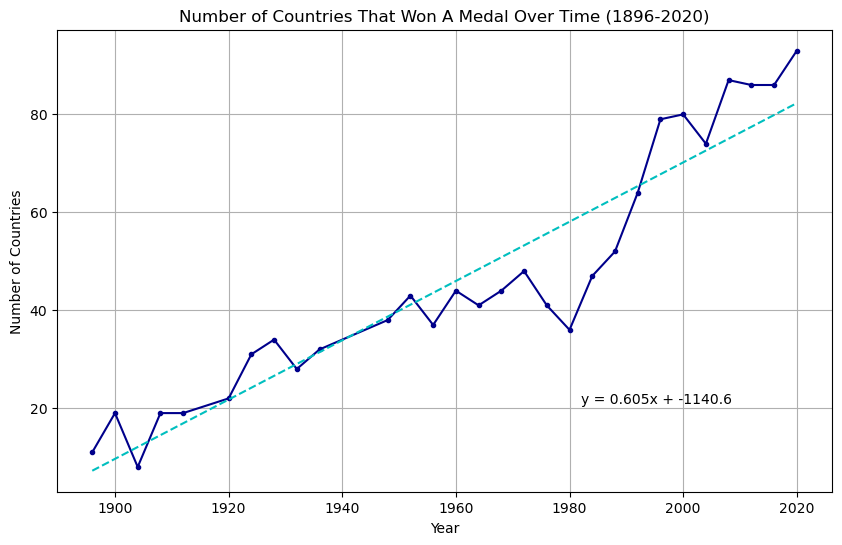

In [110]:
country_medal_count_per_year_df = summer_only_df.groupby('year')['country'].nunique().reset_index()

# Plot for number of countries that won a medal each summer Olympic

# Set values for x and y axis
x_values = country_medal_count_per_year_df['year']
y_values = country_medal_count_per_year_df['country']

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,1))

# Plot data with linear regression annotated
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='.', color='darkblue', linestyle='-')
plt.plot(x_values,regress_values,"c--")
plt.annotate(line_eq,(1982,21),fontsize=10,color="black")

plt.title('Number of Countries That Won A Medal Over Time (1896-2020)')
plt.xlabel('Year')
plt.ylabel('Number of Countries')

plt.grid(True)
plt.show() 

# Analysis of number of participating countries

In [100]:
event_results_df = pd.DataFrame(event_results_data) # Convert original CSV file into dataframe
event_results_df.shape[0]

316834

In [101]:
Exclude_strings = ['Winter', 'Intercalated', 'Equestrian'] # Create list of string values we want excluded from the dataset we want to look at
summer_only_event_df = event_results_df[~event_results_df['edition'].str.contains('|'.join(Exclude_strings), case=False)] # Create df containing only summer olympics
summer_only_event_df.head()

,edition,edition_id,country_noc,sport,event,result_id,athlete,athlete_id,pos,medal
0,1896 Summer Olympics,1,BUL,Artistic Gymnastics,"Horse Vault, Men",70002,Charles Champaud,31002,AC,NaN
1,1896 Summer Olympics,1,BUL,Artistic Gymnastics,"Parallel Bars, Men",70006,Charles Champaud,31002,AC,NaN
2,1896 Summer Olympics,1,BUL,Artistic Gymnastics,"Pommelled Horse, Men",70003,Charles Champaud,31002,AC,NaN
3,1896 Summer Olympics,1,BUL,Athletics,"Pole Vault, Men",56024,Charles Champaud,31002,DNS,NaN
4,1896 Summer Olympics,1,DEN,Artistic Gymnastics,"Rope Climbing, Men",70007,Viggo Jensen,41776,4,NaN


In [102]:
country_part_count_per_year_df = summer_only_event_df.groupby('edition')['country_noc'].nunique().reset_index()

# Keep the number of the year and remove 'Summer Olympics' 
country_part_count_per_year_df['edition'] = country_part_count_per_year_df['edition'].str.split().str[0]
country_part_count_per_year_df.head()


,edition,country_noc
0,1896,13
1,1900,27
2,1904,10
3,1908,23
4,1912,29


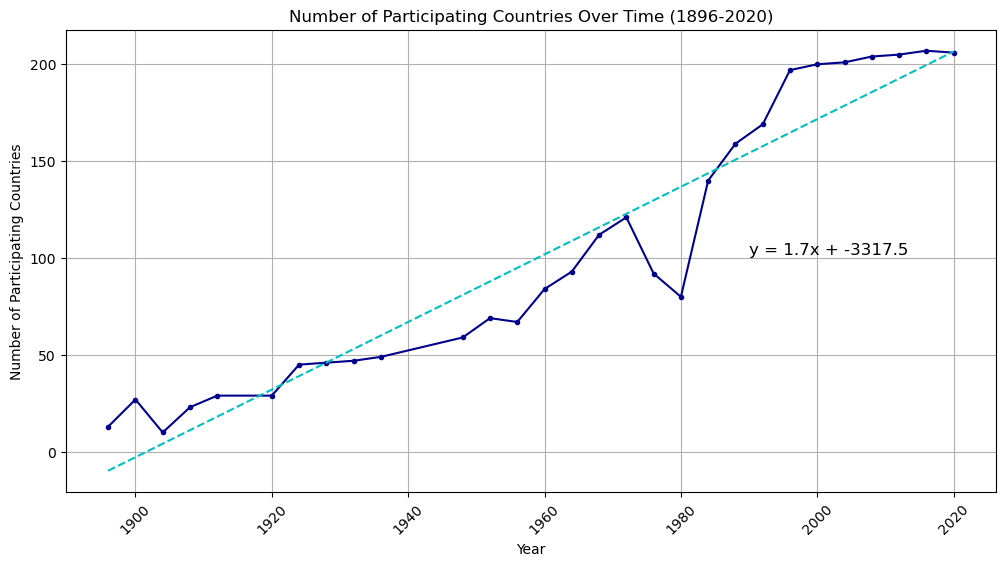

In [103]:
country_part_count_per_year_df

# Set values for x and y axis
x_values = country_part_count_per_year_df['edition'].values.astype(float) #the linear regression did not accept the original value type and needed to be changed
y_values = country_part_count_per_year_df['country_noc'].values.astype(float)

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 1)) + "x + " + str(round(intercept, 1))

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(x_values, y_values, marker='.', color='darkblue', linestyle='-')
plt.plot(x_values, regress_values, "c--")
plt.xticks(rotation=45)

# Annotate the regression equation
plt.annotate(line_eq, (1990, 102), fontsize=12, color="black")

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Participating Countries')
plt.title('Number of Participating Countries Over Time (1896-2020)')

plt.grid(True)
plt.show()


# Analysis of number of countries that won a medal compared to number of participating countries

In [104]:
country_medal_count_per_year_df.info() # Prepare dataset for merge


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   year     29 non-null     int64
 1   country  29 non-null     int64
dtypes: int64(2)
memory usage: 596.0 bytes


In [105]:
new_column_names = {"edition":"year", "country_noc":"country_participating"} # Change column header to match the other df
country_part_count_per_year_df = country_part_count_per_year_df.rename(columns=new_column_names)
country_part_count_per_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   29 non-null     object
 1   country_participating  29 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 596.0+ bytes


In [106]:
country_part_count_per_year_df['year'] = country_part_count_per_year_df['year'].astype('int64') # Change data type for column that will be used to merge
country_part_count_per_year_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   year                   29 non-null     int64
 1   country_participating  29 non-null     int64
dtypes: int64(2)
memory usage: 596.0 bytes


In [107]:
merged_country_count_per_year = pd.merge(country_medal_count_per_year_df, country_part_count_per_year_df, on="year") # Merge the two dataframes
merged_country_count_per_year.head()

,year,country,country_participating
0,1896,11,13
1,1900,19,27
2,1904,8,10
3,1908,19,23
4,1912,19,29


In [108]:
merged_country_count_per_year_df = pd.DataFrame(merged_country_count_per_year) # Calculate percentage of participating countries that won a medal
merged_country_count_per_year_df['percentage_medal']= merged_country_count_per_year_df['country'
																						 ] / merged_country_count_per_year_df['country_participating']
merged_country_count_per_year_df['percentage_medal'] = merged_country_count_per_year_df['percentage_medal'] *100 # Change data from decimals to whole percentage
merged_country_count_per_year_df.head()

,year,country,country_participating,percentage_medal
0,1896,11,13,84.615385
1,1900,19,27,70.370370
2,1904,8,10,80.000000
3,1908,19,23,82.608696
4,1912,19,29,65.517241


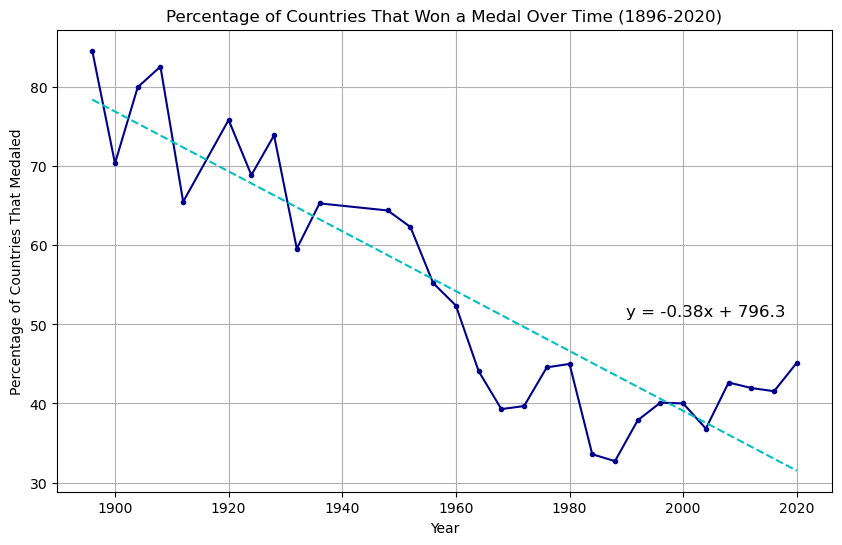

In [109]:
merged_country_count_per_year_df

# Set values for x and y axis
x_values = merged_country_count_per_year_df['year']
y_values = merged_country_count_per_year_df['percentage_medal']

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 1))

# Plot data and linear regression
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='.', color='darkblue', linestyle='-')
plt.plot(x_values, regress_values, "c--")

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Percentage of Countries That Medaled')
plt.title('Percentage of Countries That Won a Medal Over Time (1896-2020)')
plt.annotate(line_eq, (1990, 51), fontsize=12, color="black")

plt.grid(True)
plt.show()
